In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab08.ipynb")

# Lab 8: Feature Engineering & Cross-Validation
In this lab, you will practice using `scikit-learn` to do feature engineering and cross-validation to produce a model with low error on held-out data.

### Due Date 
This assignment is due on **Sunday, March 7th at 11:59pm** PST.

### Collaboration Policy
Data science is a collaborative activity. While you may talk with others about this assignment, we ask that you **write your solutions individually**. If you discuss the assignment with others, please **include their names** in the cell below.

**Collaborators:** *list names here*

In [3]:
# Run this cell to set up your notebook
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_context("talk")

from IPython.display import display, Latex, Markdown

### Introduction

For this lab, we will use a toy dataset to predict the house prices in Boston with data provided by the `sklearn.datasets` package. There are more interesting datasets in the package if you want to explore them during your free time!

Run the following cell to load the data. `load_boston()` will return a dictionary object which includes keys for:
- `data` : the covariates (X)
- `target` : the response vector (Y)
- `feature_names`: the column names
- `DESCR` : a full description of the data
- `filename`: name of the csv file


In [5]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

A look at the `DESCR` attribute tells us the data contains these features:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 USD
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of black 
                 residents by town
    13. LSTAT    % lower status of the population
    
Let's now convert this data into a pandas DataFrame. 

In [6]:
boston = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Question 1

Let's model this housing price data! Before we can do this, however, we need to split the data into training and test sets. The latter, held-out points, will be used to choose the best performing model. Remember that the response vector (housing prices) lives in the `target` attribute. A random seed is set here so that we can deterministically generate the same splitting in the future if we want to test our result again and find potential bugs.

Use the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split out 10% of the data for the test set. Call the resulting splits `X_train`, `X_test`, `Y_train`, `Y_test`.

<!--
BEGIN QUESTION
name: q1
-->

In [7]:
from sklearn.model_selection import train_test_split
np.random.seed(47)

X = boston
Y = pd.Series(boston_data['target'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10) # SOLUTION

In [8]:
grader.check("q1")

q1 passed!

### Question 2

As a warmup, fit a linear model to describe the relationship between the housing price and all available covariates. We've imported `sklearn.linear_model` as `lm`, so you can use that instead of typing out the whole module name. Fill in the cells below to fit a linear regression model to the covariates and create a scatter plot for our predictions vs. the true prices.

<!--
BEGIN QUESTION
name: q2
-->

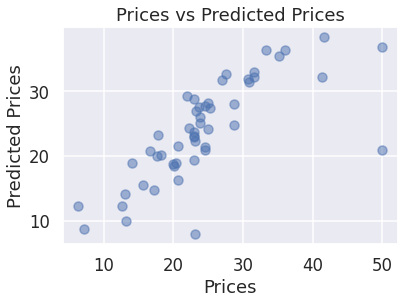

In [9]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit your linear model
#linear_model.fit(...)

# BEGIN SOLUTION NO PROMPT
linear_model.fit(X_train, Y_train);
# END SOLUTION
# Predict housing prices on the test set
Y_pred = linear_model.predict(X_test) # SOLUTION

# Plot predicted vs true prices
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices");

Briefly analyze the scatter plot above. Do you notice any outliers? Write your answer in the cell below.

_Type your answer here, replacing this text._

**SOLUTION:**
From the scatter plot above, we see that our obtained model is not perfect. We do see a positive linear relationship between the true house prices and the predicted house prices, however we don't see a line of slope 1, which would indicate the best possible relationship between the true house prices and the predicted house prices. In terms of outliers, we see a couple of points that lie outside the general trend of the data.

### Question 3

As we find from the scatter plot, our model is not perfect. If it were perfect, we would see the identity line (i.e. a line of slope 1). Compute the root mean squared error (RMSE) of the predicted responses: 

$$
\textbf{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 }
$$

Fill out the function below and compute the RMSE for our predictions on both the training data `X_train` and the test set `X_test`.  Your implementation **should not** use for loops.

<!--
BEGIN QUESTION
name: q3
-->

In [10]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    return np.sqrt(np.mean((actual_y - predicted_y) ** 2)) # SOLUTION

train_error = rmse(Y_train, linear_model.predict(X_train)) # SOLUTION
test_error = rmse(Y_test, linear_model.predict(X_test)) # SOLUTION

print("Training RMSE:", train_error)
print("Test RMSE:", test_error)

Training RMSE: 4.56230596093393
Test RMSE: 5.887073477757787


In [11]:
grader.check("q3")

q3 passed!

Is your training error lower than the test error? If so, why could this be happening? Answer in the cell below.

_Type your answer here, replacing this text._

**SOLUTION:**
The training error is lower than the test error. It makes sense because we might be overfitting to our training data. Our model might be a bit too complex, resulting in higher model variance. We will address this problem with cross-validation.

## Overfitting and Cross Validation

Sometimes we can get even more accuracy by adding more features. For example, the code below adds the square, square root, and hyperbolic tangent of every feature to the design matrix. We've chosen these bizarre features specifically to highlight overfitting.

In [12]:
boston_with_extra_features = boston.copy()
for feature_name in boston.columns:
    boston_with_extra_features[feature_name + "^2"] = boston_with_extra_features[feature_name] ** 2
    boston_with_extra_features["sqrt" + feature_name] = np.sqrt(boston_with_extra_features[feature_name])
    boston_with_extra_features["tanh" + feature_name] = np.tanh(boston_with_extra_features[feature_name])
    
boston_with_extra_features.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,tanhTAX,PTRATIO^2,sqrtPTRATIO,tanhPTRATIO,B^2,sqrtB,tanhB,LSTAT^2,sqrtLSTAT,tanhLSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,1.0,234.09,3.911521,1.0,157529.6100,19.922349,1.0,24.8004,2.231591,0.999905
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,1.0,316.84,4.219005,1.0,157529.6100,19.922349,1.0,83.5396,3.023243,1.000000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,1.0,316.84,4.219005,1.0,154315.4089,19.819939,1.0,16.2409,2.007486,0.999368
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,1.0,349.69,4.324350,1.0,155732.8369,19.865296,1.0,8.6436,1.714643,0.994426
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,1.0,349.69,4.324350,1.0,157529.6100,19.922349,1.0,28.4089,2.308679,0.999953


We split up our data again and refit the model. From this cell forward, we append `2` to the variable names `X_Train, X_test, Y_train, Y_test, train_error, test_error` in order to maintain our original data. **Make sure you use these variable names from this cell forward**.

In [13]:
np.random.seed(32)
X = boston_with_extra_features
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.10)
linear_model.fit(X_train2, Y_train2);

Looking at our training and test RMSE, we see that they are lower than you computed earlier. This strange model is seemingly better, even though it includes seemingly useless features like the hyperbolic tangent of the average number of rooms per dwelling.

In [14]:
train_error2 = rmse(Y_train2, linear_model.predict(X_train2)) 
test_error2 = rmse(Y_test2, linear_model.predict(X_test2))

print("Training RMSE:", train_error2)
print("Test RMSE:", test_error2)

Training RMSE: 3.2698705135205683
Test RMSE: 5.1774349437243385


However, if we plot the training and test error as we add each additional feature, we see that our model is beginning to overfit. That is, even though our training error continues to decrease (since our model variance is decreasing), our test error starts increasing since the lessons learned from these last 20+ features aren't actually useful when applied to unseen data. That is, our model isn't generalizable.

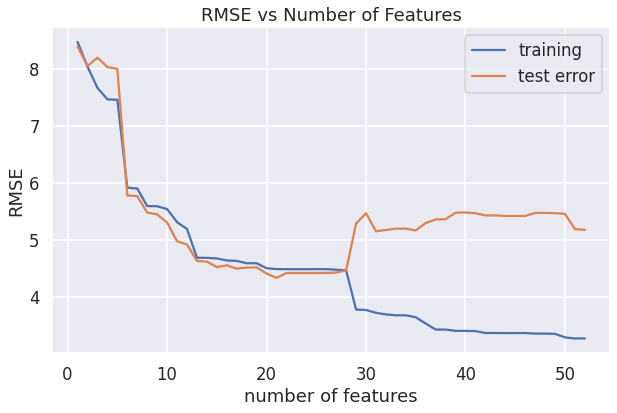

In [15]:
train_error_vs_N = []
test_error_vs_N = []

range_of_num_features = range(1, X_train2.shape[1] + 1)

for N in range_of_num_features:
    X_train_first_N_features = X_train2.iloc[:, :N]    
    
    linear_model.fit(X_train_first_N_features, Y_train2)
    train_error_overfit = rmse(Y_train2, linear_model.predict(X_train_first_N_features))
    train_error_vs_N.append(train_error_overfit)
    
    X_test_first_N_features = X_test2.iloc[:, :N]
    test_error_overfit = rmse(Y_test2, linear_model.predict(X_test_first_N_features))    
    test_error_vs_N.append(test_error_overfit)
    
plt.figure(figsize=(10, 6))
plt.plot(range_of_num_features, train_error_vs_N)
plt.plot(range_of_num_features, test_error_vs_N)
plt.legend(["training", "test error"])
plt.title('RMSE vs Number of Features')
plt.xlabel("number of features")
plt.ylabel("RMSE");

## Cross Validation

To figure out which feature set to use, we can use cross validation. Since there are 52 features, in theory, we could consider $2^{52}$ different models. For the sake of simplicity, we'll consider only 52 models, where the $i$th model includes features 1 through $i$. For example, the 3rd model would include the first 3 features only ("CRIM", "ZN", and "INDUS").

While using fewer features may increase our training error, it may also decrease our test error and help prevent overfitting to the training set.

You might ask, why don't we just use the plot above to find $p$, the optimal number of features? In real life, you'd NEVER generate this plot. Using the test set more than once for any reason is not a good idea. Otherwise, you're effectively using the test data to fit your hyperparameters (in this case, N, the number of features).

In the next section, we'll instead use $k$-fold cross-validation to select the best subset of features for our model. Recall the approach looks something like:

<img src="cv.png" width=500px>

**Warning**: The above questions are to illustrate some general differences we can see between train set and test set and the phenomenon on overfitting, however, we **should not use the test set at all when selecting models**. Instead, we should use cross-validation to select the feature set. When selecting features or choosing hyper-parameters, we can split the training set further into multiple train and validation sets (each split is called a "fold", hence k-fold cross validation). We will use the average validation error across all k folds to help select the optimal hyper-parameters and feature set.

**Furthermore,** selecting the first $N$ features, in general, is not a good way to select features, since the order of our columns is relatively meaningless. We present this as an example for you here to illustrate the concept of cross validation. In future assignments, we will look at more robust methods for feature selection.

### Question 4

Scikit-learn has built-in support for cross validation.  However, to better understand how cross validation works complete the following function which cross validates a given model.

1. Use the [`KFold.split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function to get 4 splits on the training data. Note that `split` returns the indices of the data for that split.
2. For **each** split:
    1. Select out the training and validation rows and columns based on the split indices and features.
    2. Compute the RMSE on the validation split.
    3. Return the average error across all cross validation splits.

<!--
BEGIN QUESTION
name: q4
-->

In [16]:
from sklearn.model_selection import KFold

def compute_CV_error(model, X_train, Y_train):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)
    You should be fitting 4 models total.
    Return the average MSE of these 4 folds.

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=4)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = ..., ...
        split_Y_train, split_Y_valid = ..., ...

        # Fit the model on the training split
        ...
        
        # Compute the RMSE on the validation split
        error = ...

        # BEGIN SOLUTION NO PROMPT
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]
      
        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        error = rmse(model.predict(split_X_valid), split_Y_valid)
        # END SOLUTION

        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [17]:
grader.check("q4")

q4 passed!

### Question 5

Use `compute_CV_error` to determine how many of the first $N$ features we should use to get the lowest average validation error. Then, fill in the variables `best_num_features`, `best_err`.

**Hint:** To find the index of the lowest error in `errors`, you may want to use [`np.argmin`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html). Watch out for off by one issues when converting the index to the number of features!

<!--
BEGIN QUESTION
name: q5
-->

In [18]:
errors = []
for N in range_of_num_features:
    print(f"Trying first {N} features")
    model = lm.LinearRegression()
    
    # compute the cross validation error
    error = compute_CV_error(model, X_train2.iloc[:, :N], Y_train2) # SOLUTION
    
    print("\tRMSE:", error)
    errors.append(error)

best_num_features = np.argmin(errors) + 1 # SOLUTION
best_err = errors[best_num_features - 1] # SOLUTION

print(f"Best choice, use the first {best_num_features} features")

Trying first 1 features
	RMSE: 8.581150577084149
Trying first 2 features
	RMSE: 8.125865214963715
Trying first 3 features
	RMSE: 7.738180187021341
Trying first 4 features
	RMSE: 7.632049305353877
Trying first 5 features
	RMSE: 7.629393578369707
Trying first 6 features
	RMSE: 5.98231365825963
Trying first 7 features
	RMSE: 5.980514093466237
Trying first 8 features
	RMSE: 5.712282161140919
Trying first 9 features
	RMSE: 5.750658661544751
Trying first 10 features
	RMSE: 5.696779129741673
Trying first 11 features
	RMSE: 5.520418538695555
Trying first 12 features
	RMSE: 5.386645144720658
Trying first 13 features
	RMSE: 4.911840194279865
Trying first 14 features
	RMSE: 4.918542280046527
Trying first 15 features
	RMSE: 4.917668111163133
Trying first 16 features
	RMSE: 4.887036452983436
Trying first 17 features
	RMSE: 4.884948658923527
Trying first 18 features
	RMSE: 4.830376514816799
Trying first 19 features
	RMSE: 4.83338006494078
Trying first 20 features
	RMSE: 4.758498029423191
Trying firs

In [19]:
grader.check("q5")

q5 passed!

Why is it logical to use the set of features that result in the smallest average root mean squared error when performing cross-validation? Write your answer in the cell below.

_Type your answer here, replacing this text._

**SOLUTION:** Since we do not use any information about the validation data in the training process, the result will likely resemble the outcome we get on the test data. Hence, the set of features that perform the best on the validation data are most likely to have the best results on test data as well.

### Question 6

Finally, fit a linear model using your best feature set and predict housing prices for your original test set. You can also try to select your own features (on top of the given ones) to lower the RMSE. Compute the final train and test RMSEs for a linear model using your best feature set.

<!--
BEGIN QUESTION
name: q6
-->

In [20]:
# Fit your linear model
...

# Predict points from our test set and calculate the rmse
train_rmse = ... 
test_rmse = ...

# BEGIN SOLUTION NO PROMPT
model = lm.LinearRegression()
model.fit(X_train2.iloc[:, :best_num_features], Y_train2)
train_rmse = rmse(model.predict(X_train2.iloc[:, :best_num_features]), Y_train2) 
test_rmse = rmse(model.predict(X_test2.iloc[:, :best_num_features]), Y_test2)
# END SOLUTION
print("Train RMSE", train_rmse)
print("KFold Validation RMSE", best_err)
print("Test RMSE", test_rmse)

Train RMSE 3.6763760967534527
KFold Validation RMSE 4.011693858972221
Test RMSE 5.197762151588735


In [22]:
grader.check("q6")

q6 passed!

Here we've plotted a residual plot for each record from `X_test2`. After seeing your testing and training error, it is often helpful to visiualize your error. When points in the residual plot are randomly scattered around the line y = 0, then we know that a linear regression model is good for the data we have.

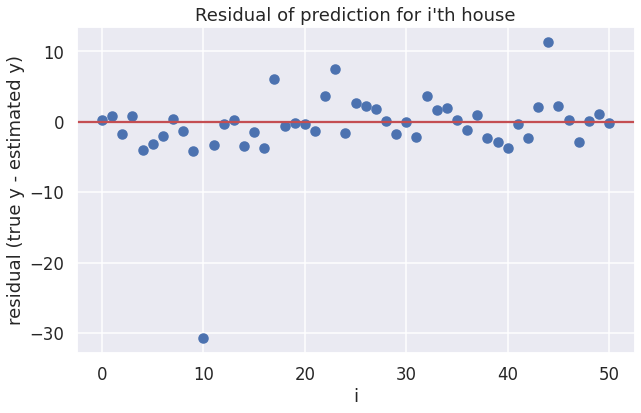

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(X_test2)), Y_test2 - model.predict(X_test2.iloc[:, :best_num_features]))
plt.xlabel('i')
plt.ylabel('residual (true y - estimated y)')
plt.title("Residual of prediction for i'th house")
plt.axhline(y = 0, color='r');

Nice! You've used $k$-fold cross-validation to fit a linear regression model to the housing data.

In the future, you'd probably want to use something like [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) to automatically perform cross-validation, but it's instructive to do it yourself at least once.

## Submission

Congratulations! You are finished with this assignment. Please don't forget to submit by 11:59pm PST on Monday, November 2nd!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)